# Reward Training Analysis

Cohort 2

In [1]:
from rt_extension import Reward_Training
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Reward_Training\Day 1\Removed"


# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Reward_Training\Day 1\mpfc"
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Reward_Training\Day 10\mpfc"
# brain_region = '#FFAF00'


# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Reward_Training\Day 1\nac"
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Reward_Training\Day 10\nac"
brain_region = '#15616F'


In [3]:
exp = Reward_Training(experiment_folder_path=experiment_path, behavior_folder_path=None)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Reward_Training\Day 10\nac\n1-240607-081029\Notes.txt
read from t=0s to t=1704.01s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Reward_Training\Day 10\nac\n2-240607-103821\Notes.txt
read from t=0s to t=1681.18s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Reward_Training\Day 10\nac\n3-240607-130651\Notes.txt
read from t=0s to t=1682.76s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Reward_Training\Day 10\nac\n4-240607-153934\Notes.txt
read from t=0s to t=1691.35s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Reward_Training\Day 10\nac\n5-240911-062153\Notes.txt
read from t=0s to t=1769.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Reward_Training\Day 10\nac\n6-240

In [4]:
exp.rt_processing()

Reward Training Processing n1-240607-081029...
Reward Training Processing n2-240607-103821...
Reward Training Processing n3-240607-130651...
Reward Training Processing n4-240607-153934...
Reward Training Processing n5-240911-062153...
Reward Training Processing n6-240911-085311...
Reward Training Processing n7-240911-111928...


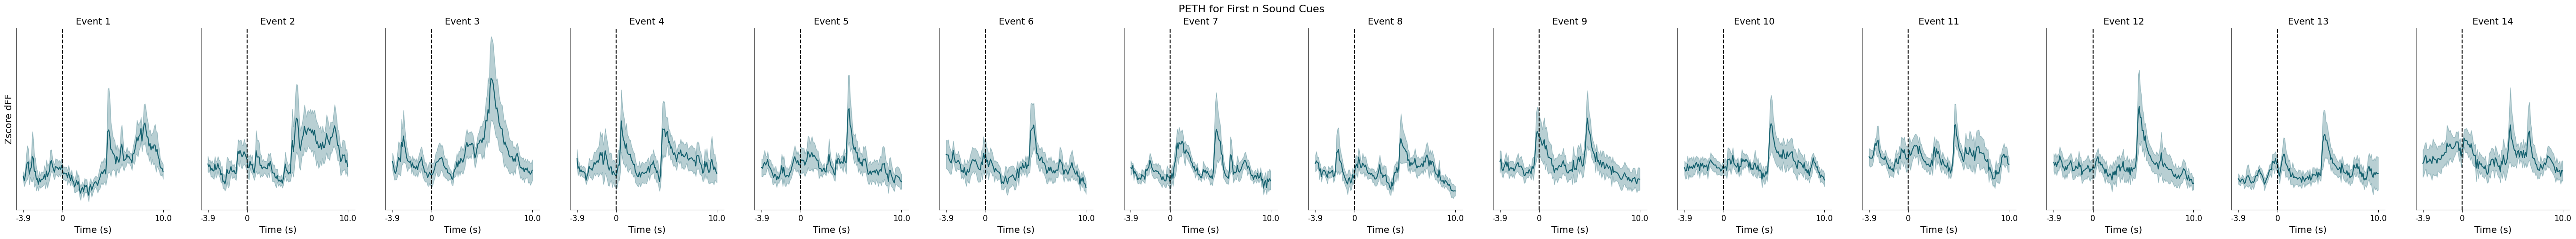

In [5]:
# Compute PETH around the first 5 sound cues
exp.rt_compute_peth_per_event(behavior_name='sound cues', n_events=14, pre_time=100, post_time=10, bin_size=0.1)

# Plot the PETH
exp.rt_plot_peth_per_event(signal_type='zscore', error_type='sem', title='PETH for First n Sound Cues',
                          color=brain_region, display_pre_time=4, display_post_time=10, yticks_interval=2)


In [6]:
# # common_time_axis, peri_event_signals = exp.compute_peth_for_selected_events([14])
# # exp.plot_peth_for_all_sounds(common_time_axis, peri_event_signals)
# common_time_axis, peri_event_signals = exp.compute_peth_for_all_sounds()
# exp.plot_peth_for_all_sounds(common_time_axis, peri_event_signals)

In [7]:
from scipy.stats import linregress
def plot_linear_fit_with_error_bars(df, color='blue', y_limits=None):
    """
    Plots the mean DA values with SEM error bars, fits a line of best fit,
    and computes the Pearson correlation coefficient.
    
    Parameters:
    - df: A pandas DataFrame containing trial numbers, mean DA signals, and SEMs.
    - color: The color of the error bars and data points.
    - y_limits: A tuple (y_min, y_max) to set the y-axis limits. If None, limits are set automatically.
    
    Returns:
    - slope: The slope of the line of best fit.
    - intercept: The intercept of the line of best fit.
    - r_value: The Pearson correlation coefficient.
    - p_value: The p-value for the correlation coefficient.
    """
    # Sort the DataFrame by Trial
    df_sorted = df.sort_values('Trial')
    
    # Extract trial numbers, mean DA values, and SEMs
    x_data = df_sorted['Trial'].values
    y_data = df_sorted['Mean_DA'].values
    y_err = df_sorted['SEM_DA'].values
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    y_fitted = intercept + slope * x_data
    
    # Plot the data with error bars and the fitted line
    plt.figure(figsize=(12, 7))
    plt.errorbar(x_data, y_data, yerr=y_err, fmt='o', label = 'DA during Port Entry', color=color, 
                 capsize=10, markersize=20, elinewidth=4, capthick=3)
    plt.plot(x_data, y_fitted, 'r--', label=f'$R^2$ = {(r_value)**2:.2f}, p = {p_value:.3f}', linewidth=3)
    plt.xlabel('Tone Number', fontsize=36, labelpad=12)
    plt.ylabel('Global Z-scored ΔF/F', fontsize=36, labelpad=12)
    plt.title('', fontsize=10)
    plt.legend(fontsize=20)
    
    # Set custom x-ticks from 2 to 16 (whole numbers)
    plt.xticks(np.arange(1, 14, 2), fontsize=26)

    # Set y-axis limits if provided
    if y_limits is not None:
        plt.ylim(y_limits)

    # Remove the top and right spines
    ax = plt.gca()  # Get current axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)    # Left axis line
    ax.spines['bottom'].set_linewidth(2)  # Bottom axis line

    
    # Optionally, adjust tick label sizes
    ax.tick_params(axis='both', which='major', labelsize=32, width=2)  # Adjust tick label size and width


    plt.tight_layout()
    plt.savefig(f'linear.png', transparent=True, bbox_inches='tight', pad_inches=0.1)

    plt.show()
    
    print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}")
    print(f"Pearson correlation coefficient (R): {r_value:.4f}, p-value: {p_value:.4e}")
    

Processing trial: n1-240607-081029
No DA data found for port entry at 4.0 seconds in trial n1-240607-081029.
Processing trial: n2-240607-103821
No DA data found for port entry at 4.0 seconds in trial n2-240607-103821.
Processing trial: n3-240607-130651
No DA data found for port entry at 4.0 seconds in trial n3-240607-130651.
Processing trial: n4-240607-153934
No DA data found for port entry at 4.0 seconds in trial n4-240607-153934.
Processing trial: n5-240911-062153
No DA data found for port entry at 4.0 seconds in trial n5-240911-062153.
Processing trial: n6-240911-085311
No DA data found for port entry at 4.0 seconds in trial n6-240911-085311.
Processing trial: n7-240911-111928
No DA data found for port entry at 4.0 seconds in trial n7-240911-111928.


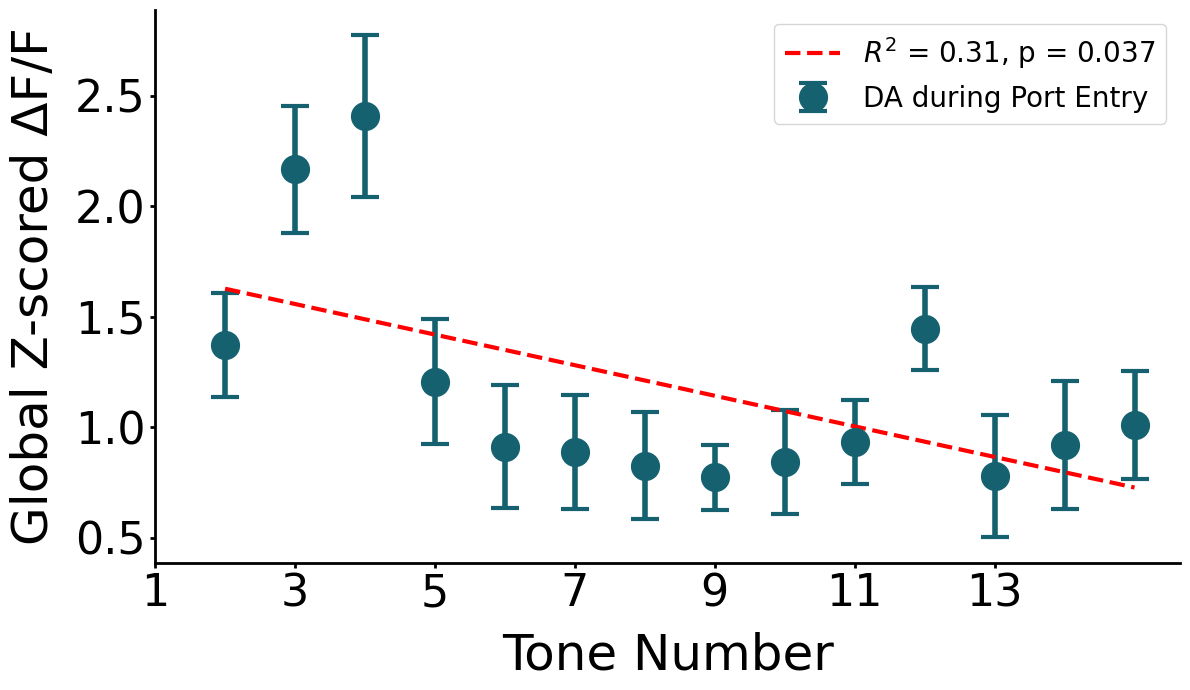

Slope: -0.0692, Intercept: 1.7653
Pearson correlation coefficient (R): -0.5603, p-value: 3.7160e-02


In [8]:
df = exp.compute_mean_da_across_trials()
df = df.iloc[1:].reset_index(drop=True)
plot_linear_fit_with_error_bars(df, color=brain_region)

Processing block: n1-240607-081029
Processing block: n2-240607-103821
Processing block: n3-240607-130651
Processing block: n4-240607-153934
Processing block: n5-240911-062153
Processing block: n6-240911-085311
Processing block: n7-240911-111928


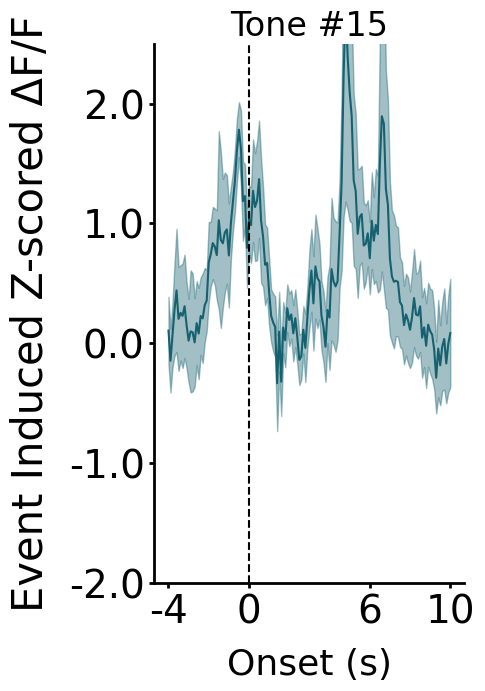

In [9]:
# Parameters
selected_indices = [15]  # Specify which events to plot (1-based index)
event_type = 'sound cues'  # Choose between 'port entries' or 'sound cues'
pre_time = 4    # Time before event onset to include in PETH (seconds)
post_time = 10   # Time after event onset to include in PETH (seconds)
bin_size = 0.1  # Bin size for PETH (seconds)
y_axis_limits = (-1.5, 2.5)  # Set y-axis limits as a tuple (min, max). Set to None for auto-scaling.

# Initialize data structures
peri_event_signals = [[] for _ in selected_indices]  # List to collect signals for each selected event
common_time_axis = np.arange(-pre_time, post_time + bin_size, bin_size)

# Iterate over all trials in exp
for block_name, block_data in exp.trials.items():
    print(f"Processing block: {block_name}")

    # Extract event onsets based on the chosen event type
    event_onsets = np.array(block_data.behaviors[event_type].onset)
    
    # For each selected event
    for idx, event_index in enumerate(selected_indices):
        # Ensure the event_index is within the range of available events
        if event_index > len(event_onsets):
            print(f"Event index {event_index} exceeds the number of {event_type} in block {block_name}. Skipping.")
            continue
        
        # Get the onset of the specified event
        sc_onset = event_onsets[event_index - 1]  # 1-based index adjustment
        
        if event_type == 'port entries':
            # For port entries, find the first port entry after the sound cue onset
            pe_indices = np.where(block_data.behaviors['sound cues'].onset > sc_onset)[0]
            if len(pe_indices) == 0:
                print(f"No sound cues found after {event_type} at {sc_onset} seconds in block {block_name}.")
                continue
            sc_onset = block_data.behaviors['sound cues'].onset[pe_indices[0]]
        
        # Define time window around the event onset
        start_time = sc_onset - pre_time
        end_time = sc_onset + post_time
        
        # Get indices of DA signal within this window
        indices = np.where((block_data.timestamps >= start_time) & (block_data.timestamps <= end_time))[0]
        if len(indices) == 0:
            print(f"No DA data found for {event_type} at {sc_onset} seconds in block {block_name}.")
            continue
        
        # Extract DA signal and timestamps
        da_segment = block_data.zscore[indices]
        time_segment = block_data.timestamps[indices] - sc_onset  # Align time to event onset
        
        # Interpolate DA signal onto the common time axis
        interpolated_da = np.interp(common_time_axis, time_segment, da_segment)
        
        # Collect the interpolated DA signal
        peri_event_signals[idx].append(interpolated_da)

# Now, peri_event_signals is a list where each element is a list of DA signals from each block for that event

# Plot individual PETHs side by side for each selected event number
num_events = len(selected_indices)
fig, axes = plt.subplots(1, num_events, figsize=(4 * num_events, 7), sharey=True)
if num_events == 1:
    axes = [axes]  # Ensure axes is iterable

for i, ax in enumerate(axes):
    event_signals = peri_event_signals[i]
    if not event_signals:
        print(f"No data collected for {event_type} {i+1}.")
        continue
    # Convert to numpy array
    event_signals = np.array(event_signals)
    # Compute mean and SEM
    mean_peth = np.mean(event_signals, axis=0)
    sem_peth = np.std(event_signals, axis=0) / np.sqrt(len(event_signals))
    # Plot
    ax.plot(common_time_axis, mean_peth, color=brain_region, label='Mean DA')
    ax.fill_between(common_time_axis, mean_peth - sem_peth, mean_peth + sem_peth, color=brain_region, alpha=0.4)
    ax.axvline(0, color='black', linestyle='--')
    ax.set_title(f'Tone #{selected_indices[i]}', fontsize=24)
    ax.set_xlabel('Onset (s)', fontsize=26, labelpad=12)
    
    # Only show y-axis label and ticks on the first plot
    if i == 0:
        ax.set_ylabel('Event Induced Z-scored ΔF/F', fontsize=30, labelpad= 12)
    else:
        ax.tick_params(axis='y', labelleft=False)  # Hide y-ticks on subsequent plots

    # Set x-ticks and labels, including 6 seconds
    ax.set_xticks([common_time_axis[0], 0, 6, common_time_axis[-1]])
    ax.set_xticklabels([f'{common_time_axis[0]:.1f}', '0', '6.0', f'{common_time_axis[-1]:.1f}'], fontsize=20)
    ax.set_xticklabels(['-4', '0','6', '10'], fontsize=24)
    
    # Apply the same y-axis limits across all plots and ensure 0 is included
    if y_axis_limits:
        ax.set_ylim(y_axis_limits)
    else:
        # Adjust to include 0 in y-axis range
        min_y = min(0, np.min(mean_peth - sem_peth))
        max_y = max(0, np.max(mean_peth + sem_peth))
        ax.set_ylim(min_y, max_y)

    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_yticklabels(['-2.0', '-1.0', '0.0', '1.0', '2.0'], fontsize=28)
    
    # Manually ensure 0 is included in y-ticks
    y_ticks = ax.get_yticks()
    if 0 not in y_ticks:
        y_ticks = np.append(y_ticks, 0)
    ax.set_yticks(y_ticks)
    ax.tick_params(axis='both', which='major', labelsize=28, width=2)  # Adjust tick label size and width

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # **Adjust spine linewidths to make axes lines thicker**
    ax.spines['left'].set_linewidth(2)    # Left axis line
    ax.spines['bottom'].set_linewidth(2)  # Bottom axis line

plt.savefig(f'PETH.png', transparent=True, bbox_inches='tight', pad_inches=0.1)

# plt.suptitle(f'Mean PETH for Selected {event_type.capitalize()} Events', fontsize=16)
plt.show()